# PROGETTO DI ESAME PER LABORATORIO DI BIG DATA, DATA MINING E DATA ANALYTICS

# Introduzione

L'obiettivo di questo progetto è analizzare un dataset sui Pokémon per identificare pattern e trend significativi nelle loro caratteristiche. Utilizzando librerie Python comuni per l'analisi dei dati (numpy, pandas, matplotlib, seaborn, statsmodels), sono stati esplorati diversi aspetti, come i tipi, le generazioni, le caratteristiche fisiche e le metriche legate al genere.

# Fonte dei dati

Il dataset è stato scaricato da Kaggle al seguente link: [Pokemon Stats - 1025 Pokémon](https://www.kaggle.com/datasets/guavocado/pokemon-stats-1025-pokemons/data). Contiene informazioni dettagliate sui Pokémon, inclusi tipi, statistiche, generazione, altezza, peso, genere e catch rate. È stato salvato in formato CSV e caricato nel repository del progetto.

# Obiettivi dell'analisi

1. Analisi dei Tipi Pokémon:

  - Visualizzare la distribuzione quantitativa dei Pokémon in base ai tipi.
  - Studiare l'influenza dei tipi sulle statistiche totali.
  - Confrontare Pokémon con uno o due tipi.            
           

2. Analisi Generazionale:

- Osservare come le statistiche medie cambiano nelle diverse generazioni.
- Analizzare le tendenze nelle statistiche per generazione.                           

3. Relazione tra Altezza, Peso e Statistiche Totali:

- Determinare l'esistenza di una relazione tra altezza/peso e le statistiche totali, eliminando i casi estremi.

4. Analizi per genere:

- Identificare il numero di Pokémon con e senza genere.
- Calcolare la distribuzione percentuale di maschi e femmine.
- Confrontare le statistiche medie per categoria di genere.

# Metodologia

Pulizia dei Dati:                   
- Le colonne non pertinenti sono state rimosse per semplificare l'analisi.                                       
- I valori mancanti nelle colonne chiave sono stati gestiti in modo appropriato (es. sostituzione con "None" per type2).

Tecniche di Analisi:                                             
- Analisi descrittiva per visualizzare distribuzioni e statistiche riassuntive.
- Regressioni lineari e analisi delle correlazioni per indagare relazioni tra variabili.
- Test statistici per confrontare i gruppi.           

Colore dei Grafici:
- Grafici interattivi e statici (scatter plot, box plot, line plot, heatmap).
- Uso di codifiche cromatiche coerenti per rappresentare variabili chiave (es. tipi dei Pokémon).

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Importo le librerie necessarie

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Caricamento e visualizzazione del dataset

In [37]:
pokemon_df = pd.read_csv('pokemon_data.csv')

pokemon_df

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,255,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary


Selezione delle colonne necessarie per l'analisi e verifica dei dati selezionati

In [38]:
columns_to_keep = [
    'generation', 'type1', 'type2', 'height', 'weight', 'hp', 'attack', 'defense', 
    'sp_atk', 'sp_def', 'speed', 'total', 'catch_rate', 'percent_male', 'percent_female'
]

pokemon_df = pokemon_df[columns_to_keep]

pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   generation      1025 non-null   int64  
 1   type1           1025 non-null   object 
 2   type2           526 non-null    object 
 3   height          1025 non-null   float64
 4   weight          1025 non-null   float64
 5   hp              1025 non-null   int64  
 6   attack          1025 non-null   int64  
 7   defense         1025 non-null   int64  
 8   sp_atk          1025 non-null   int64  
 9   sp_def          1025 non-null   int64  
 10  speed           1025 non-null   int64  
 11  total           1025 non-null   int64  
 12  catch_rate      1025 non-null   int64  
 13  percent_male    870 non-null    float64
 14  percent_female  870 non-null    float64
dtypes: float64(4), int64(9), object(2)
memory usage: 120.2+ KB


Le discrepanze sono dovute al fatto che:            
- Non tutti i Pokemon hanno 2 tipi                       
- Non tutti i Pokemon hanno un genere                 

# 1. Analisi dei Tipi

# - Visualizzare la distribuzione quantitativa dei Pokémon in base ai tipi.

Impostazione del tema grafico e dizionario dei colori per i tipi

In [39]:
sns.set_theme(style="whitegrid")

colors = {
    'Normal': '#d3d3d3', 'Fire': '#ffb84d', 'Water': '#4d94ff', 'Grass': '#66cc66', 'Electric': '#ffeb3b',
    'Ice': '#80d4ff', 'Fighting': '#ff6666', 'Poison': '#b24dff', 'Ground': '#b2996e', 'Flying': '#66c2ff',
    'Psychic': '#ff80cc', 'Bug': '#99cc66', 'Rock': '#808080', 'Ghost': '#8a4b8e', 'Dragon': '#4d0080',
    'Dark': '#1a1a1a', 'Steel': '#b3b3b3', 'Fairy': '#ff66b2'
}

Conta combinata dei tipi principali e secondari.

In [40]:
type_counts = pd.concat([pokemon_df['type1'], pokemon_df['type2']]).value_counts()

Generazione della palette di colori e visualizzazione del grafico a barre

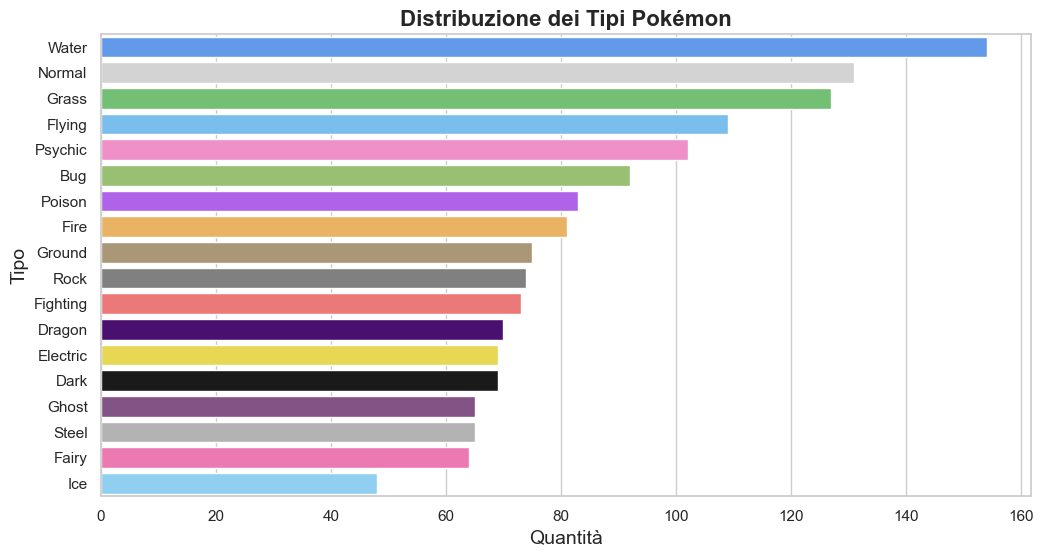

In [41]:
palette = [colors.get(t, '#d3d3d3') for t in type_counts.index]

plt.figure(figsize=(12, 6))

sns.barplot(y=type_counts.index, x=type_counts.values, hue=type_counts.index, palette=palette, edgecolor='white', dodge=False)

plt.title('Distribuzione dei Tipi Pokémon', fontsize=16, fontweight='bold')
plt.ylabel('Tipo', fontsize=14)
plt.xlabel('Quantità', fontsize=14)

plt.show()

# - Studiare l'influenza dei tipi sulle statistiche totali.

Calcolo della media delle statistiche per tipo 1 e tipo 2

In [ ]:
avg_total = (pokemon_df.groupby('type1')['total'].mean().add(pokemon_df.groupby('type2')['total'].mean(), fill_value=0) / 2).sort_values(ascending=False)

Visualizzazione della media delle statistiche

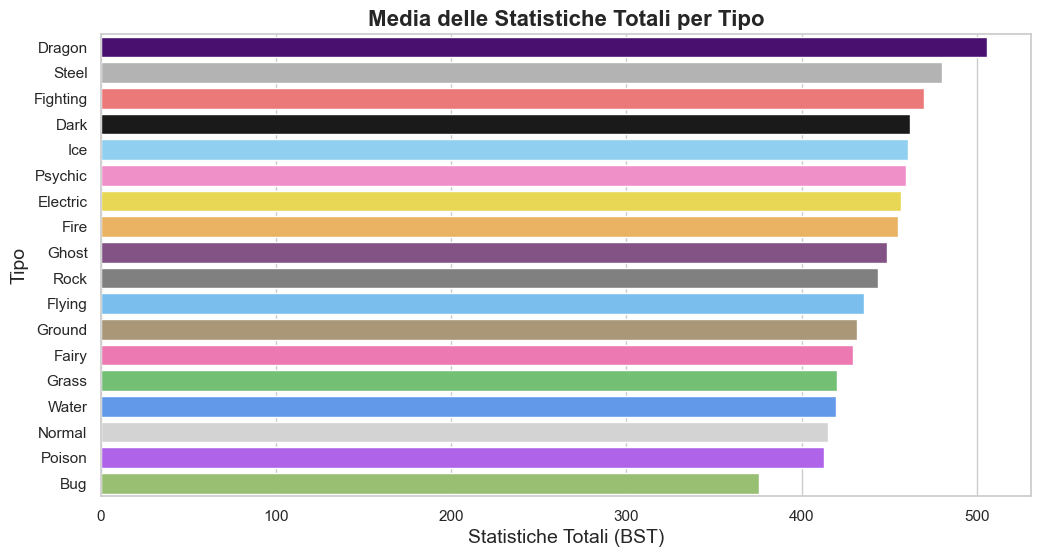

In [60]:
plt.figure(figsize=(12, 6))

sns.barplot(y=avg_total.index, x=avg_total.values, hue=avg_total.index, palette=[colors.get(t, '#d3d3d3') for t in avg_total.index], legend=False)

plt.title('Media delle Statistiche Totali per Tipo', fontsize=16, fontweight='bold')
plt.xlabel('Statistiche Totali (BST)', fontsize=14)
plt.ylabel('Tipo', fontsize=14)
plt.show()

# - Confrontare Pokémon con uno o due tipi.  

Creazione delle categorie "un tipo" e "due tipi" e riepimento delle righe vuote in type 2 con "None"

In [ ]:
pokemon_df['type2'] = pokemon_df['type2'].fillna('None')
single_type = pokemon_df[pokemon_df['type2'] == 'None']
dual_type = pokemon_df[pokemon_df['type2'] != 'None']

Media delle statistiche totali per le due categorie

In [45]:
single_avg = single_type['total'].mean()
dual_avg = dual_type['total'].mean()

Visualizzazione delle distribuzioni

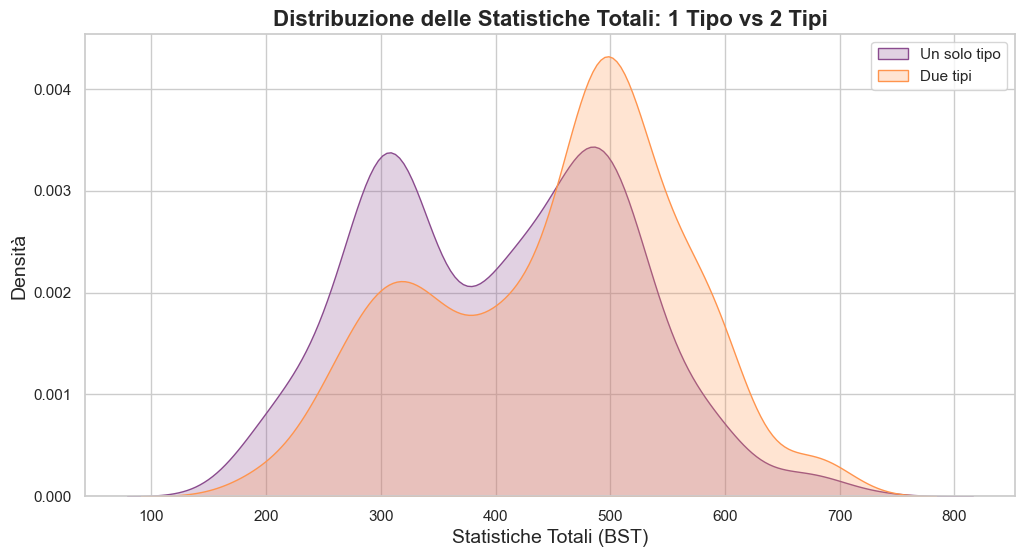

Media BST (1 tipo): 403.08
Media BST (2 tipi): 451.03


In [59]:
plt.figure(figsize=(12, 6))
sns.kdeplot(single_type['total'], label='Un solo tipo', fill=True, color='#8a4b8e')
sns.kdeplot(dual_type['total'], label='Due tipi', fill=True, color='#ff944d')
plt.title('Distribuzione delle Statistiche Totali: 1 Tipo vs 2 Tipi', fontsize=16, fontweight='bold')
plt.xlabel('Statistiche Totali (BST)', fontsize=14)
plt.ylabel('Densità', fontsize=14)
plt.legend()
plt.show()

print(f"Media BST (1 tipo): {single_avg:.2f}")
print(f"Media BST (2 tipi): {dual_avg:.2f}")

# 2. Analisi Generazionale

# - Osservare come le statistiche medie cambiano nelle diverse generazioni.

Media delle statistiche totali per generazione

In [65]:
generation_stats = pokemon_df.groupby('generation')['total'].mean()

Visualizzazione dell'andamento delle statistiche

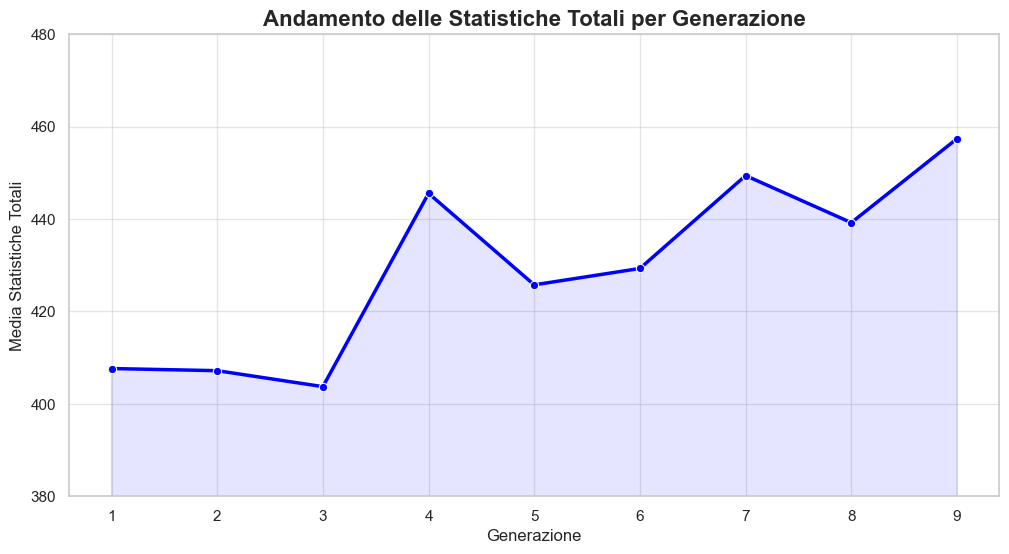

In [74]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=generation_stats.index, y=generation_stats.values, marker='o', linewidth=2.5, color="blue")

plt.grid(alpha=0.5)
plt.fill_between(generation_stats.index,generation_stats.values,color='blue',alpha=0.1)
plt.ylim(380, 480)

plt.title('Andamento delle Statistiche Totali per Generazione', fontsize=16, fontweight='bold')
plt.xlabel('Generazione', fontsize=12)
plt.ylabel('Media Statistiche Totali', fontsize=12)

plt.show()


# - Analizzare le tendenze nelle statistiche per generazione.

Lista delle statistiche principali

In [ ]:
stats = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

Visualizzazione delle statistiche principali per generazione

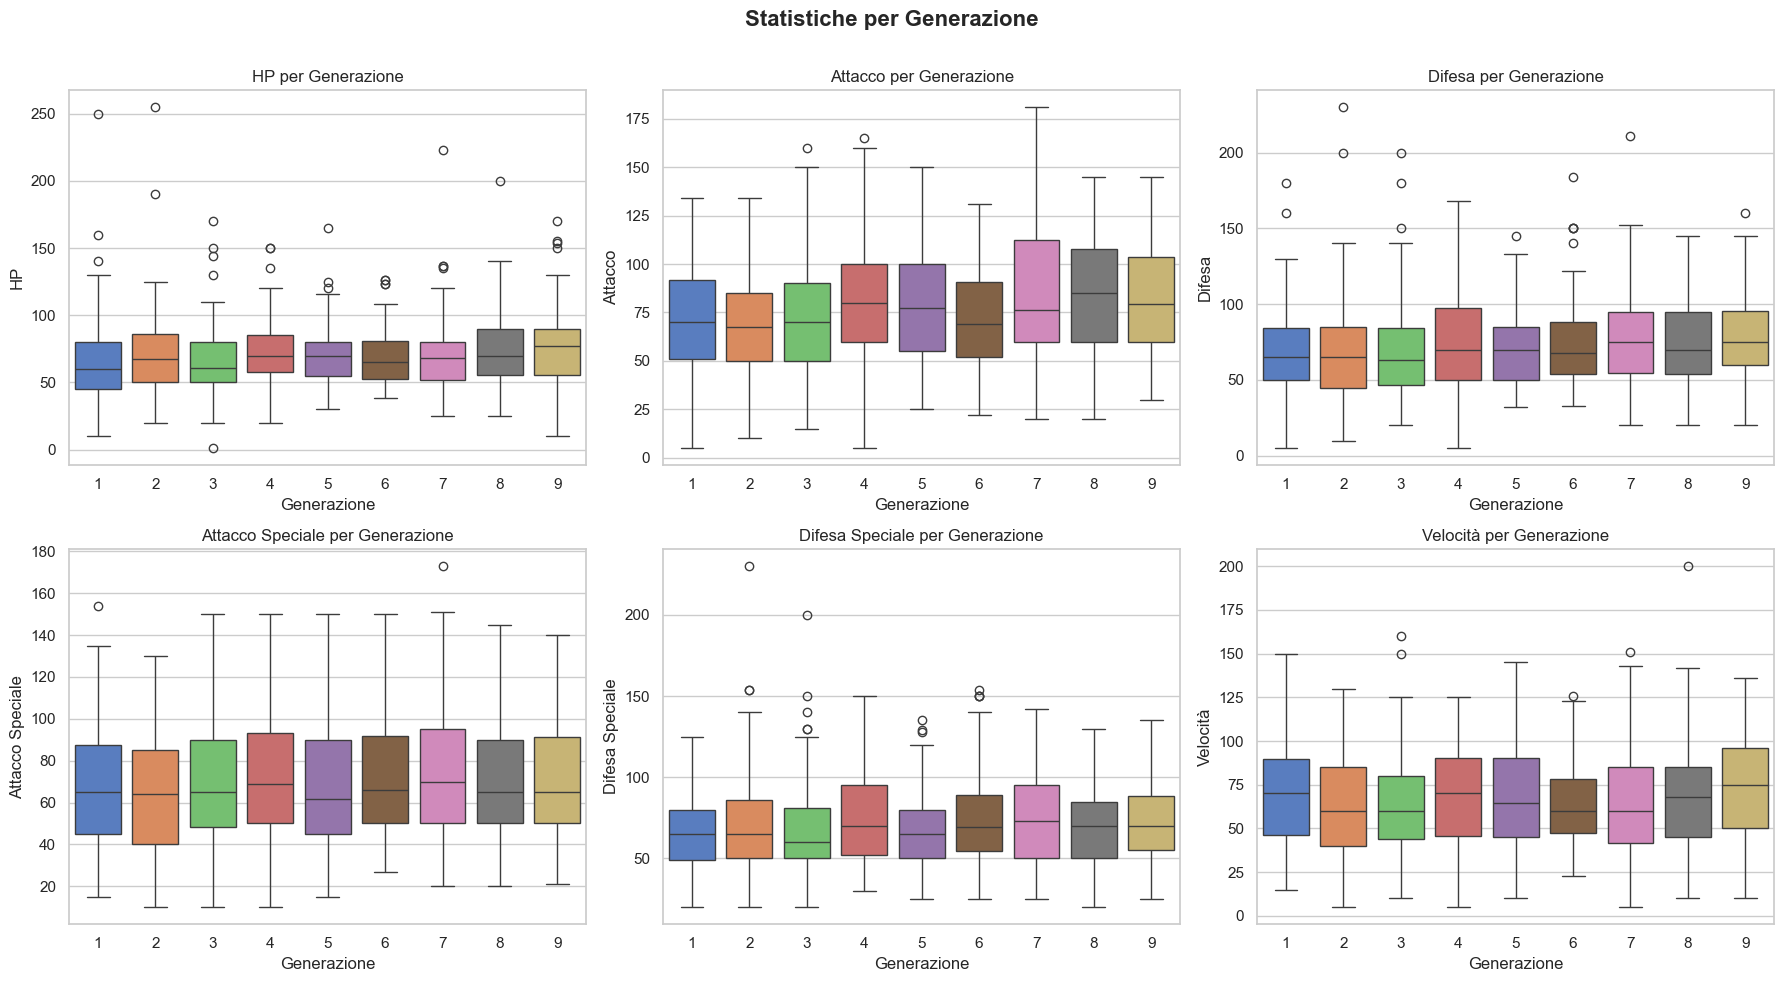

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

titles = ['HP', 'Attacco', 'Difesa', 'Attacco Speciale', 'Difesa Speciale', 'Velocità']

for i, stat in enumerate(stats):
    ax = axes[i//3, i%3] 
    sns.boxplot(x='generation', y=stat, data=pokemon_df, hue='generation', palette='muted', ax=ax, legend=False)
    ax.set_title(f'{titles[i]} per Generazione')
    ax.set_xlabel('Generazione')
    ax.set_ylabel(titles[i])


plt.suptitle('Statistiche per Generazione', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



# 3. Relazione tra Altezza, Peso e Statistiche Totali:

# - Determinare l'esistenza di una relazione tra altezza/peso e le statistiche totali, eliminando i casi estremi.

Filtraggio per altezza e peso eliminando outlier (5%-95%)

In [78]:
filtered_df = pokemon_df[
    pokemon_df['height'].between(*pokemon_df['height'].quantile([0.05, 0.95])) &
    pokemon_df['weight'].between(*pokemon_df['weight'].quantile([0.05, 0.95]))
]

Visualizzazione delle due relazioni altezza/statistiche e peso/statistiche

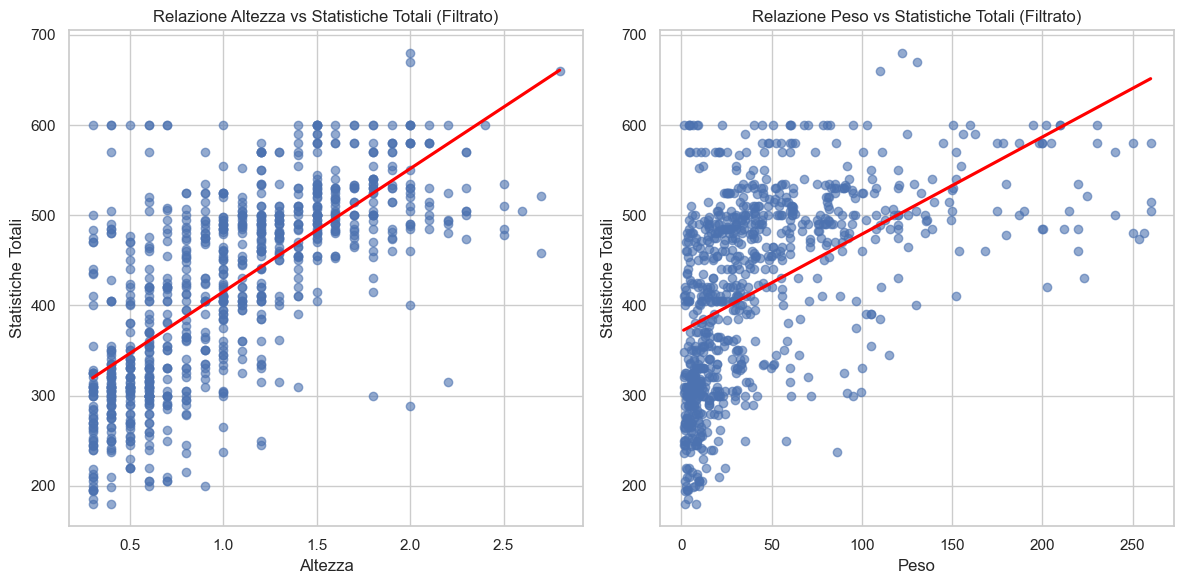

In [83]:
plt.figure(figsize=(12, 6))

# Relazione altezza/statistiche
plt.subplot(1, 2, 1)
sns.regplot(x='height', y='total', data=filtered_df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.title('Relazione Altezza vs Statistiche Totali (Filtrato)')
plt.xlabel('Altezza')
plt.ylabel('Statistiche Totali')

# Relazione peso/statistiche
plt.subplot(1, 2, 2)
sns.regplot(x='weight', y='total', data=filtered_df,scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.title('Relazione Peso vs Statistiche Totali (Filtrato)')
plt.xlabel('Peso')
plt.ylabel('Statistiche Totali')

plt.tight_layout()
plt.show()

# 4. Analizi per genere:

# - Identificare il numero di Pokémon con e senza genere.

Creazione di una colonna per verificare la presenza del genere

In [ ]:
pokemon_df['has_gender'] = pokemon_df['percent_male'].notna()

gender_counts = pokemon_df['has_gender'].value_counts()

Visualizzazione

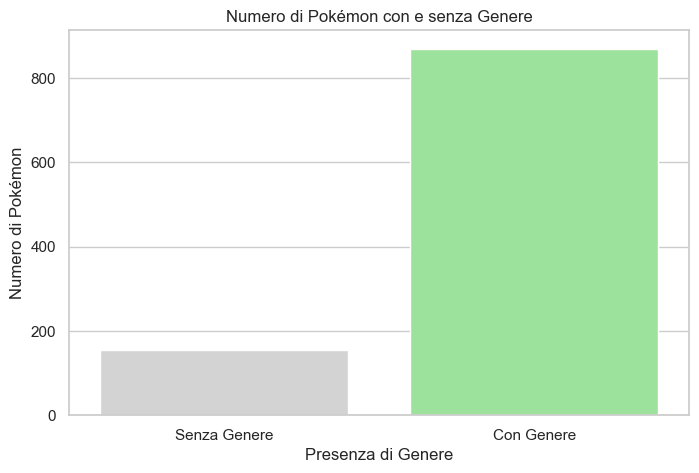

In [54]:
plt.figure(figsize=(8, 5))

sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['lightgrey', 'lightgreen'], hue=gender_counts.index, legend=False)

plt.xticks([0, 1], ['Senza Genere', 'Con Genere'])
plt.title('Numero di Pokémon con e senza Genere')
plt.ylabel('Numero di Pokémon')
plt.xlabel('Presenza di Genere')
plt.show()

# - Calcolare la distribuzione percentuale di maschi e femmine.

Creazione di una colonna per verificare la presenza del genere

In [ ]:
pokemon_df['has_gender'] = pokemon_df['percent_male'].notna()

Suddivisione dei Pokémon con e senza genere

In [106]:
gendered_pokemon = pokemon_df[pokemon_df['has_gender']]
no_gender_pokemon = pokemon_df[~pokemon_df['has_gender']]

Calcolo delle medie di percentuale maschile e femminile

In [107]:
avg_male = gendered_pokemon['percent_male'].mean()
avg_female = gendered_pokemon['percent_female'].mean()

Visualizzazione delle percentuali medie maschili e femminili

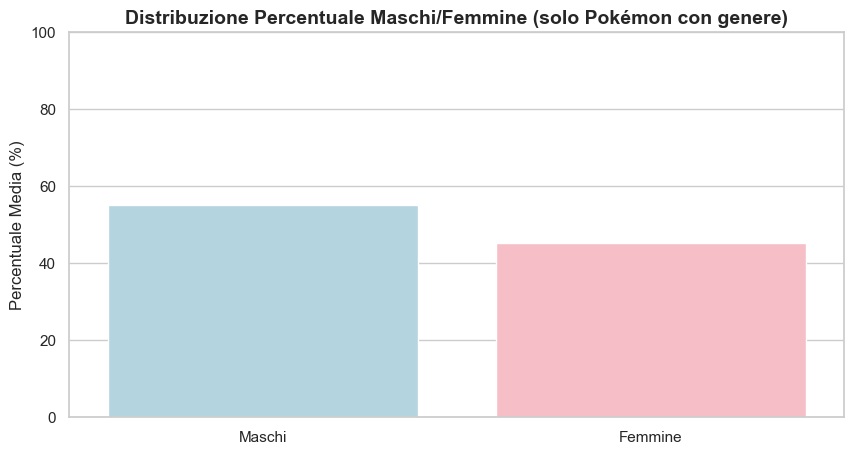

Percentuale media maschi (solo Pokémon con genere): 54.93%
Percentuale media femmine (solo Pokémon con genere): 45.07%


In [108]:
plt.figure(figsize=(10, 5))
sns.barplot(x=['Maschi', 'Femmine'], y=[avg_male, avg_female], hue=['Maschi', 'Femmine'], palette=['lightblue', 'lightpink'], legend=False)
plt.title('Distribuzione Percentuale Maschi/Femmine (solo Pokémon con genere)', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.ylabel('Percentuale Media (%)', fontsize=12)
plt.show()

print(f"Percentuale media maschi (solo Pokémon con genere): {avg_male:.2f}%")
print(f"Percentuale media femmine (solo Pokémon con genere): {avg_female:.2f}%")

# - Confronto Statistiche Medie per Categoria di Genere

Creazione di una colonna per la categoria di genere e applicazione della funzione per categorizzare

In [ ]:
def categorize_gender(row):
    if pd.isna(row['percent_male']):
        return 'Senza Genere'
    elif row['percent_male'] > 50:
        return 'Più Maschi'
    elif row['percent_male'] < 50:
        return 'Più Femmine'
    else:
        return '50 e 50'

pokemon_df['gender_category'] = pokemon_df.apply(categorize_gender, axis=1)

Creazione di un DataFrame che mostra le medie delle statistiche per ogni categoria e lista di statistiche chiave.

In [ ]:
stats = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']
category_stats = pokemon_df.groupby('gender_category')[stats].mean()

Heatmap comparativa con categorie di genere

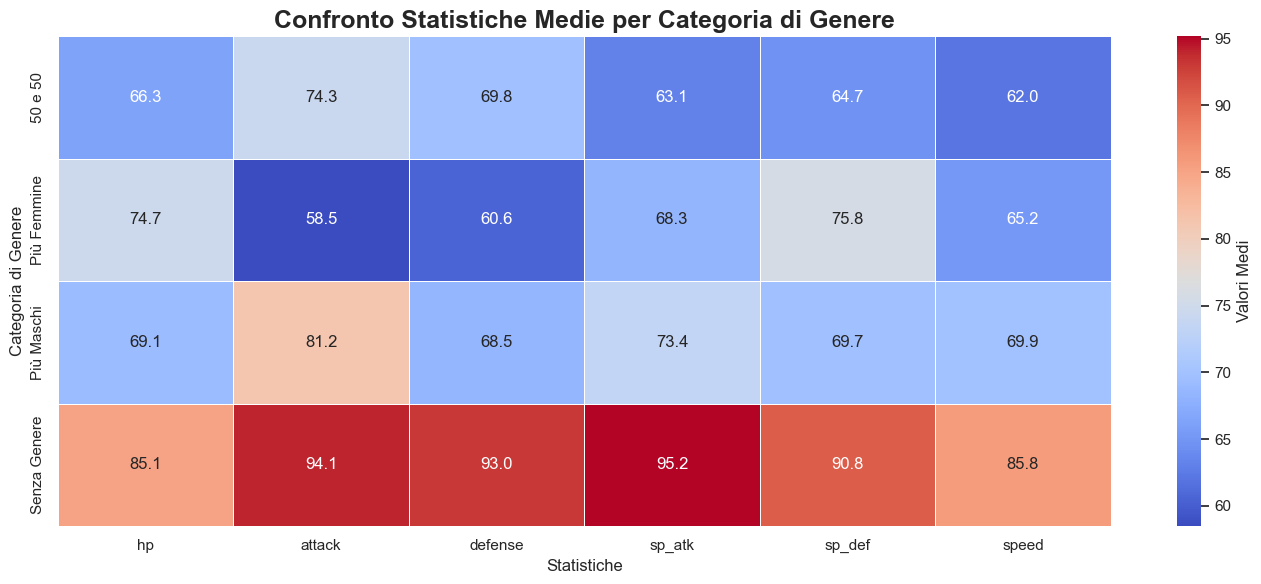

In [116]:
plt.figure(figsize=(14, 6))

sns.heatmap(category_stats, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5,cbar_kws={'label': 'Valori Medi'})

plt.title('Confronto Statistiche Medie per Categoria di Genere', fontsize=18, fontweight='bold')
plt.xlabel('Statistiche', fontsize=12)
plt.ylabel('Categoria di Genere', fontsize=12)
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conclusioni

# 1. Analisi dei Tipi Pokémon

- Distribuzione dei tipi:                                                                                
I tipi più frequenti nel dataset sono Acqua, Normale e Erba, mentre i tipi meno comuni includono Folletto e Ghiaccio. Questo riflette la varietà di tipi presenti nei giochi.

- Influenza sui valori delle statistiche:                                                                   
I Pokémon di tipo Drago e Acciaio tendono ad avere le statistiche totali più alte, mentre i tipi come Veleno e Coleottero risultano avere valori medi inferiori.

- Tipo singolo vs doppio tipo:                                               
I Pokémon con due tipi mostrano statistiche totali più elevate (451.03 in media) rispetto a quelli con un solo tipo (403.08 in media), suggerendo un vantaggio strategico delle combinazioni di tipo.

# 2. Analisi Generazionale

- Statistiche per generazione:                                                                     
Le generazioni più recenti (soprattutto dalla sesta in poi) mostrano un miglioramento delle statistiche medie, con un aumento progressivo del totale delle statistiche dei Pokémon rispetto alle generazioni precedenti

- Tendenze per statistica:                                                     
Da questa analisi emergono diverse correlazioni. Ad esempio, le generazioni più recenti, come la settima e l'ottava, presentano Pokémon con valori di Attacco più elevati rispetto alle prime generazioni, che mostrano valori più contenuti.

# 3. Relazione tra Altezza, Peso e Statistiche Totali

- Correlazioni:                                                                                              
Esiste una correlazione moderata tra peso e statistiche totali, con i Pokémon più pesanti che tendono ad avere statistiche migliori. Tuttavia, l'altezza risulta essere leggermente più significativa rispetto al peso quando si tratta di correlazione con le statistiche totali.

# 4. Analisi per Genere

- Distribuzione di genere:                                                                             
La maggior parte dei Pokémon ha un genere identificato, ma circa il 25% dei Pokémon non ha un genere assegnato (es. leggendari e mitici). Tra quelli con genere, i maschi sono leggermente più frequenti (54.93%) rispetto alle femmine (45.07%).

- Statistiche medie per genere:                                                                                 
Le differenze nelle statistiche medie tra maschi e femmine sono minime, ma i Pokémon con predominanza maschile tendono ad avere valori leggermente superiori in Attacco e Velocità. I Pokémon senza genere, invece, presentano statistiche medie superiori, principalmente a causa della presenza di Pokémon leggendari e mitici, che generalmente hanno un BST più elevato.